<a href="https://colab.research.google.com/github/hungryjins/DA_portfolio/blob/main/Chapter21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ** Chapter 21 **
** ┗ Logistics distribution forecast **
---
> ** Contents (context) **

* Looking at the problem situation and data
* Definition of problem solving process
* 🥉Session 1 -「Distribution EDA」
* 🥈SESSION 2 -「Search for distribution by region」
* 🥇SESSION 3 -「ML Use Distribution Prediction」


In [ ]:
# Restime restart after installing Hangul fonts
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# import matplotlib.pyplot as plt
# plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (4,767 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126209 files and dire

In [ ]:
# ▶ Remove Warnings
import warnings
warnings.filterwarnings('ignore')

# ▶ Google Drive Mount
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/DA portfolio/DA_colab/21_Logistics Volume Forecasting')
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/DA portfolio/DA_colab/21_Logistics Volume Forecasting'

## ** Looking at the problem situation and data **
---
> ** Scenario ** 🚛 (logistics manager)

``
A logistics makers are increasing the number of customer claims for damaging goods during the phase/off process.Because the characteristics of each item need to be careful because there are different parts
It's not hard.Therefore, A is trying to operate the delivery by selecting the appropriate courier vehicles that meet the area where the certain items are delivered and the appropriate courier vehicle for the purpose.
``


> ** Looking at the data **

* There is a departure information 'Song Ha -in_ Lattice space -specific number', and the destination information 'Suhan_ Lattice space -specific number', and the number of cases by category of goods is loaded.


In [ ]:
# ▶ Data read
import pandas as pd
df = pd.read_csv('chatper21_logistic.csv', encoding='cp949')
df.head(10)

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,운송장_건수
0,0,5011000595017300,2871000192069300,음반,3
1,1,4148000690043300,5011000264024400,문화컨텐츠,3
2,2,5011000078068400,1120000007005400,농산물,3
3,3,4127100048006400,5011000587019400,기타식품,7
4,4,5011000078068400,2823700010076300,농산물,3
5,5,5013000778073200,4159000114016400,농산물,6
6,6,5011000316024300,4827000369060200,수산,5
7,7,5013000740006400,4111700017039400,농산물,3
8,8,4136000209094100,5013000823053400,아우터,3
9,9,5011000315056100,4127100026035200,농산물,8



## ** Problem solving process definition **
---
> ** ** of the problem

``
▶ Product shipping customer claim increase number, number of damaged items
``

> ** Expected effect **

``
▶ Decrease the number of claim cases, decrease in the number of damages
``

> ** Solution **

``
▶ Proper vehicle dispatch and employee training through analysis of delivery volume by region
▶ Session 1 🥉
-DATA pretreatment and shipping area and goods category data exploration
▶ Session 2 🥈
-Analysis of the number of shipping/goods categories at the departure and destination
▶ Session 3 🥇
-Shipping volume forecast using ML algorithm
``

> ** Performance measurement **

``
▶ Monitor the number of claim cases after delivery operation
``

> ** Public application **

``
▶ Extraction and dispatch of goods shipping by region
▶ Customer CLAIM reduction activities through employee training
``

> ** Main code preview **

``
▶ Session 1 → SET (), value_counts ()
▶ Session 2 → List.append ()
▶ Session 3 → RandomForestressor (), Labelencoder (), Mean_absolute_error, R2_SCORE
``


## ** 🥉Session 1 **
** ┗ Distribution EDA **
---


### · Data pretreatment
---
* Check the basic information of the collected data

(1) Data Shape Check

(2) Check Data Type

(3) NULL value check (※ Data of empty values)

(4) Outlier verification (※ Data beyond normal category)


In [ ]:
# ▶ Data type confirmation
# ▶ 31,684 ROW, 5 COL
print('df', df.shape)

df (31684, 5)


In [ ]:
# ▶ Data Type Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31684 entries, 0 to 31683
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         31684 non-null  int64 
 1   송하인_격자공간고유번호  31684 non-null  int64 
 2   수하인_격자공간고유번호  31684 non-null  int64 
 3   물품_카테고리       31684 non-null  object
 4   운송장_건수        31684 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 1.2+ MB


In [ ]:
# ▶ Check NULL value
print(df.isnull().sum())

index           0
송하인_격자공간고유번호    0
수하인_격자공간고유번호    0
물품_카테고리         0
운송장_건수          0
dtype: int64


In [ ]:
# ▶ Outlier verification
df.describe()

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,운송장_건수
count,31684.000000,3.168400e+04,3.168400e+04,31684.000000
mean,15841.500000,4.648814e+15,3.801369e+15,4.879308
std,9146.527301,8.341336e+14,1.314660e+15,6.756473
min,0.000000,1.111000e+15,1.111000e+15,3.000000
25%,7920.750000,4.713000e+15,2.826000e+15,3.000000
50%,15841.500000,5.011000e+15,4.159000e+15,3.000000
75%,23762.250000,5.013001e+15,5.011000e+15,5.000000
max,31683.000000,5.013001e+15,5.013001e+15,413.000000


### · Search for shipping area
---


In [ ]:
df.head(5)

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,운송장_건수
0,0,5011000595017300,2871000192069300,음반,3
1,1,4148000690043300,5011000264024400,문화컨텐츠,3
2,2,5011000078068400,1120000007005400,농산물,3
3,3,4127100048006400,5011000587019400,기타식품,7
4,4,5011000078068400,2823700010076300,농산물,3


In [ ]:
# ▶ Col rename
df.columns = ['index', 'start', 'end', 'prod', 'cnt']
df.head(5)

,index,start,end,prod,cnt
0,0,5011000595017300,2871000192069300,음반,3
1,1,4148000690043300,5011000264024400,문화컨텐츠,3
2,2,5011000078068400,1120000007005400,농산물,3
3,3,4127100048006400,5011000587019400,기타식품,7
4,4,5011000078068400,2823700010076300,농산물,3


In [ ]:
# ▶ 4,229 delivery departures
df['start'].value_counts()

,count
start,
5011000078068400,3882
5013000610049100,1790
5013000731055200,1235
5011000137030100,1137
5013000821028200,731
...,...
5011000892080300,1
4313000491086400,1
5011000109048100,1


In [ ]:
# ▶ 26,875 delivery destinations, more areas of shipping destinations than departures.
df['end'].value_counts()

,count
end,
5013000635005300,35
5011000543041100,33
5011000314069300,33
5011000544072300,30
5011000318044100,30
...,...
4219000145011200,1
4725000495077200,1
1132000005057400,1


In [ ]:
# ▶ Total area (departure+delivery) 30,455 pieces
all_list = list(df['start']) + list(df['end'])
unique_list = set(all_list)
len(unique_list)

30455

### · Search for goods category
---


In [ ]:
# ▶ Exploration of the type of item (100 items categories)
df['prod'].value_counts().head(30)

,count
prod,
농산물,20321
문화컨텐츠,1091
음료,1034
수산,860
가공식품,846
기타식품,698
건강식품,591
음반,576
축산,383


In [ ]:
# ▶ Based on the number of transportation cases, sorting
df_cnt = df.groupby('prod', as_index=False)['cnt'].sum()
df_cnt = df_cnt.sort_values(by=['cnt'], ascending = False )
df_cnt.head(30)

,prod,cnt
27,농산물,87829
66,음료,5890
3,가공식품,5766
34,문화컨텐츠,5429
51,수산,4880
17,기타식품,4250
5,건강식품,3413
80,축산,3385
19,기타패션의류,3042
67,음반,2357


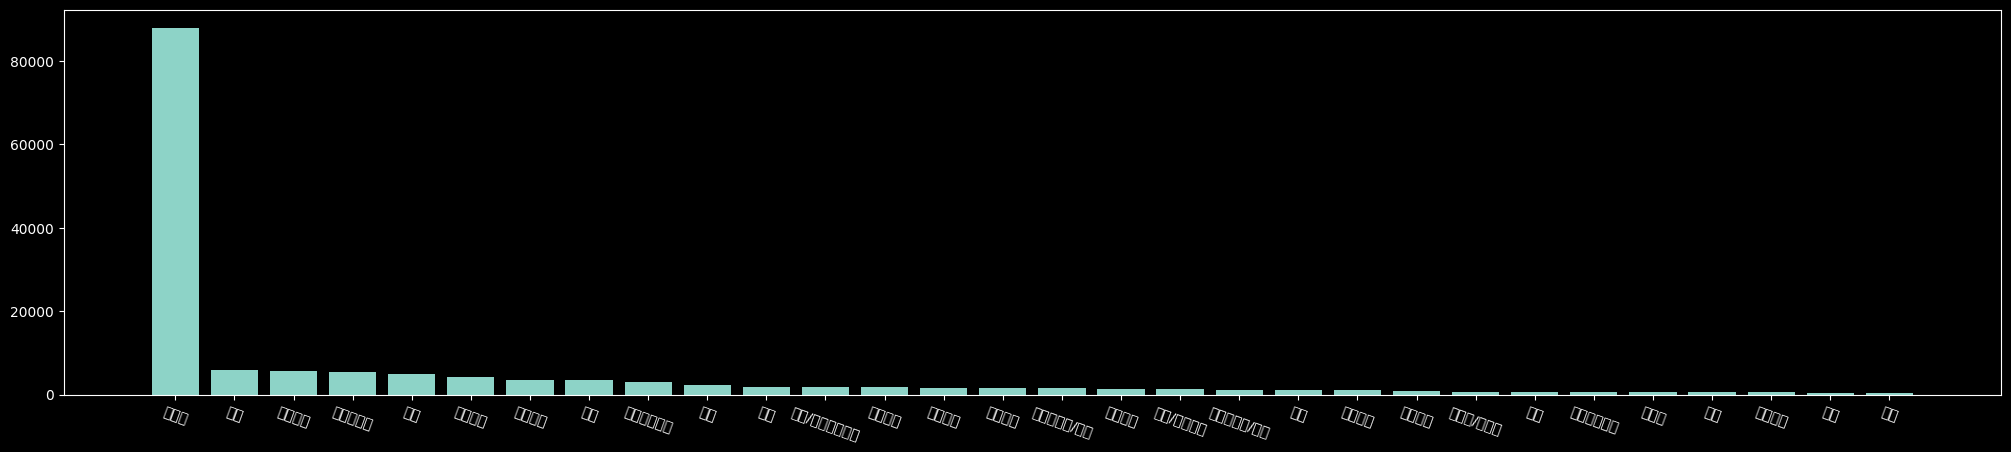

In [ ]:
# ▶ Based on the number of transportation cases, sorting plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

plt.rc('font', family='NanumBarunGothic')
plt.bar(df_cnt['prod'][0:30], df_cnt['cnt'][0:30], label='cnt');
plt.xticks(rotation =-20);
plt.gcf().set_size_inches(25, 5);

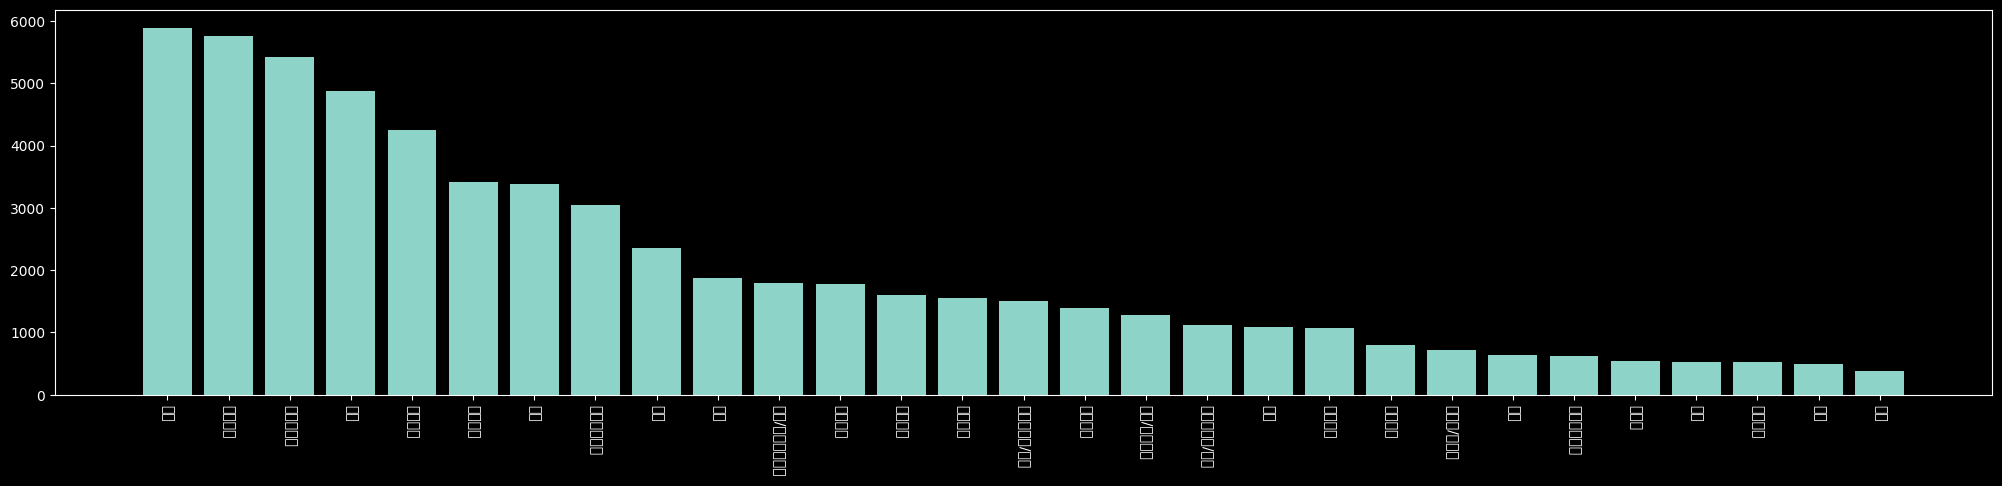

In [ ]:
# ▶ Based on the number of transportation plants, sorting plotting (※ Removal of agricultural products)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

plt.rc('font', family='NanumBarunGothic')

# ▶ If you want to change the bar graph location, use plt.barh function
plt.bar(df_cnt['prod'][1:30], df_cnt['cnt'][1:30], label='cnt');
plt.xticks(rotation =-90);
plt.gcf().set_size_inches(25, 5);

## ** 🥈Session 2 **
** ┗ Search for distribution by region **
---


In [ ]:
df.head(5)

,index,start,end,prod,cnt
0,0,5011000595017300,2871000192069300,음반,3
1,1,4148000690043300,5011000264024400,문화컨텐츠,3
2,2,5011000078068400,1120000007005400,농산물,3
3,3,4127100048006400,5011000587019400,기타식품,7
4,4,5011000078068400,2823700010076300,농산물,3


### · Departure/Division Analysis
---


In [ ]:
# ▶ The area where the most delivery starts
df['start'].value_counts()

,count
start,
5011000078068400,3882
5013000610049100,1790
5013000731055200,1235
5011000137030100,1137
5013000821028200,731
...,...
5011000892080300,1
4313000491086400,1
5011000109048100,1


In [ ]:
# ▶ In the top 500 places based on the departure, more than 80%of the total shipping case is procured
df['start'].value_counts().head(500).sum() / df['start'].value_counts().sum()

np.float64(0.7936182300214619)

In [ ]:
# ▶ The area where the most delivery arrives
df['end'].value_counts()

,count
end,
5013000635005300,35
5011000543041100,33
5011000314069300,33
5011000544072300,30
5011000318044100,30
...,...
4219000145011200,1
4725000495077200,1
1132000005057400,1


In [ ]:
# ▶ In the top 20,000 places, more than 80%of the total shipping case is procured in the top 20,000 places.
df['end'].value_counts().head(20500).sum() / df['end'].value_counts().sum()

np.float64(0.7987943441484661)

In [ ]:
df_start_end = pd.DataFrame({'start' : df['start'].value_counts(), 'end': df['end'].value_counts()})
df_start_end.fillna(0, inplace = True)
df_start_end['total'] = df_start_end['start'] + df_start_end['end']
df_start_end.head(5)

,start,end,total
1111000004097200,0.0,1.0,1.0
1111000005062300,0.0,1.0,1.0
1111000005067400,0.0,1.0,1.0
1111000007059100,0.0,1.0,1.0
1111000007071100,0.0,1.0,1.0


In [ ]:
# ▶ The area with the highest departure and delivery
df_start_end.sort_values(by=['total'], ascending = False).head(10)

,start,end,total
5011000078068400,3882.0,14.0,3896.0
5013000610049100,1790.0,0.0,1790.0
5013000731055200,1235.0,0.0,1235.0
5011000137030100,1137.0,2.0,1139.0
5013000821028200,731.0,0.0,731.0
4148000690015300,582.0,0.0,582.0
5013000777063100,475.0,0.0,475.0
5011000595017300,462.0,1.0,463.0
5011000213090100,454.0,3.0,457.0
5011000685067100,453.0,0.0,453.0


### · Analysis of distribution channels
---


In [ ]:
df.head(5)

,index,start,end,prod,cnt
0,0,5011000595017300,2871000192069300,음반,3
1,1,4148000690043300,5011000264024400,문화컨텐츠,3
2,2,5011000078068400,1120000007005400,농산물,3
3,3,4127100048006400,5011000587019400,기타식품,7
4,4,5011000078068400,2823700010076300,농산물,3


In [ ]:
# ▶ There is no specific path delivery that is delivered more frequently than you think.
# ▶ If this happens, it is impossible to use the way to dispatch on the path basis.
df_route = df.groupby(['start', 'end'], as_index=False)['prod'].count()
df_route.colimns = ['start', 'end', 'cnt']
df_route = df_route.sort_values(by=['prod'], ascending = False)
df_route.head(10)

,start,end,prod
6712,4211000650079200,5011000437052400,7
3684,4141000031030100,5013000635005300,7
3664,4141000031030100,5011000596012200,5
735,1154500001021400,5011000214025100,5
6962,4374500066090200,5011000427079100,5
3903,4146100146003300,5013000822085400,4
3314,4139000099013200,5011000374025300,4
3894,4146100146003300,5011000429068100,4
2814,4128500028049400,5011000373021200,4
7643,4721000353009200,5011000214011100,4


In [ ]:
# ▶ The most shipped area> The category is not easy because there are many items.
df[(df['start']==4141000031030100) & (df['end']==5013000635005300)]

,index,start,end,prod,cnt
4810,4810,4141000031030100,5013000635005300,주방용품,7
5657,5657,4141000031030100,5013000635005300,이미용가전,4
14325,14325,4141000031030100,5013000635005300,스킨케어,7
17413,17413,4141000031030100,5013000635005300,생활가전,3
19976,19976,4141000031030100,5013000635005300,음료,3
20177,20177,4141000031030100,5013000635005300,베이스메이크업,5
22653,22653,4141000031030100,5013000635005300,상의,3


### · Analysis of dispatching standards
---
* Selected the most items that are the most delivered based on the starting basis as the representative item


In [ ]:
 # ▶ Define the most delivered items from the departure area as the representative item
 pd.DataFrame(df[df['start']==4141000031030100].groupby('prod')['cnt'].sum().sort_values(ascending=False)).reset_index().head(1)

,prod,cnt
0,건강용품,468


In [ ]:
# ▶ Create a for statement to carry out higher conditions for all departure delivery areas
list_of_df = []

for i in list(df['start'].unique()) :
  loop_df = pd.DataFrame(df[df['start']==i].groupby('prod')['cnt'].sum().sort_values(ascending=False)).reset_index().head(1)
  loop_df['id'] = i
  list_of_df.append(loop_df)

df_accum_start = pd.concat(list_of_df)

In [ ]:
df_accum_start

,prod,cnt,id
0,음반,1652,5011000595017300
0,문화컨텐츠,383,4148000690043300
0,농산물,14380,5011000078068400
0,기타식품,96,4127100048006400
0,농산물,492,5013000778073200
...,...,...,...
0,기타패션잡화,9,4113300019005400
0,침구세트,4,4873000294001400
0,기타패션잡화,105,2638000008087200
0,스마트디바이스액세서리,3,1120000013030100


In [ ]:
# ▶ Creation of all shipping amount data by item
df_prod_sum = pd.DataFrame(df.groupby('prod', as_index = False)['cnt'].sum())
df_prod_sum.columns = ['prod', 'total']
df_prod_sum.head(5)

,prod,total
0,DIY자재/용품,150
1,PC,200
2,PC주변기기,30
3,가공식품,5766
4,가방,26


In [ ]:
# ▶ LEFT JOIN for delivery of goods based on departure
df_merge = pd.merge(df_accum_start, df_prod_sum, how='left', on='prod')
df_merge = df_merge[['id', 'prod', 'cnt', 'total']]
df_merge.head(5)

,id,prod,cnt,total
0,5011000595017300,음반,1652,2357
1,4148000690043300,문화컨텐츠,383,5429
2,5011000078068400,농산물,14380,87829
3,4127100048006400,기타식품,96,4250
4,5013000778073200,농산물,492,87829


In [ ]:
# ▶ Vehicle dispatch is possible by analyzing how many percent of the total delivery amount is loaded.
df_merge['ratio'] = df_merge['cnt'] / df_merge['total']
df_merge.head(5)

,id,prod,cnt,total,ratio
0,5011000595017300,음반,1652,2357,0.700891
1,4148000690043300,문화컨텐츠,383,5429,0.070547
2,5011000078068400,농산물,14380,87829,0.163727
3,4127100048006400,기타식품,96,4250,0.022588
4,5013000778073200,농산물,492,87829,0.005602


In [ ]:
# ▶ You will be able to dispatch characteristics where at least 50% of all items will be left.
# ▶ Completion!
df_merge[df_merge['ratio'] > 0.50]

,id,prod,cnt,total,ratio
0,5011000595017300,음반,1652,2357,0.700891
57,4148000427007400,출산/유아동의류,23,30,0.766667
70,4148000690015300,문화컨텐츠,3064,5429,0.564376
96,1117000009037100,기타디지털/가전,837,1505,0.556146
359,4127300022051100,위생/건강용품,135,249,0.542169
457,5011000320025200,네일케어,35,69,0.507246
584,4873000228047300,낚시,316,386,0.818653
596,4150000196034300,다이어트식품,419,619,0.676898
1109,4117300018005400,기타패션의류,1605,3042,0.527613
1129,4413300143027400,신발,392,637,0.615385


## ** 🥇Session 3 **
** ┗ ML Use Distribution Prediction **
---


### · Preparation of data for modeling
---
* Sharing data to FEATURE and Y, which is the value you want to predict to perform modeling
* Train / test set division for learning and prediction


In [ ]:
df.head(5)

,index,start,end,prod,cnt
0,0,5011000595017300,2871000192069300,음반,3
1,1,4148000690043300,5011000264024400,문화컨텐츠,3
2,2,5011000078068400,1120000007005400,농산물,3
3,3,4127100048006400,5011000587019400,기타식품,7
4,4,5011000078068400,2823700010076300,농산물,3


In [ ]:
# ▶ Feature (x) and Y data to learn modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

X=df.drop(['index', 'cnt'], axis=1)
Y=df['cnt']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=1239)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(19010, 3)
(19010,)
(12674, 3)
(12674,)


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(list(x_train['prod'].values) + list(x_test['prod'].values))
x_train['prod'] = le.transform(x_train['prod'])
x_test['prod'] = le.transform(x_test['prod'])

In [ ]:
x_test['prod'].head(5)

,prod
17822,27
2269,51
37,27
24369,27
17187,27


### · Model learning and evaluation
---
* Evaluate performance by learning the model and performing predictions


In [ ]:
rfr = RandomForestRegressor(n_estimators=300, max_depth=8)
# rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

RandomForestRegressor(max_depth=8, n_estimators=300)

In [ ]:
# ▶ Prediction
# ▶ Forecasts are predicted and evaluated for both data and test data used for learning (※ ※ determination)
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
y_pred_train = rfr.predict(x_train)
y_pred_test = rfr.predict(x_test)


mae_train = mean_absolute_error(y_train, y_pred_train)
print('mae_train(mae): ', mae_train)
r2_train = r2_score(y_train, y_pred_train)
print('r2_score(r2): ', r2_train)
print('')
mae_test = mean_absolute_error(y_test, y_pred_test)
print('mae_test(mae): ', mae_test)
r2_test = r2_score(y_test, y_pred_test)
print('r2_score(r2): ', r2_test)

mae_train(mae):  2.20138511638358
r2_score(r2):  0.29949201679611226

mae_test(mae):  2.3006483215916567
r2_score(r2):  0.22797534603221015


In [ ]:
pd.options.display.float_format = '{:.5f}'.format
result = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_test})
result['diff'] = result['Real Values'] - result['Predicted Values']
result.head(10)

,Real Values,Predicted Values,diff
17822,3,3.96015,-0.96015
2269,10,5.48821,4.51179
37,3,3.60948,-0.60948
24369,12,4.22776,7.77224
17187,3,4.27154,-1.27154
23981,3,5.05623,-2.05623
24832,10,3.93202,6.06798
11358,3,5.44977,-2.44977
12473,4,9.28135,-5.28135
19441,3,4.48596,-1.48596


In [ ]:
result[result['diff']>20]

,Real Values,Predicted Values,diff
23314,109,7.43153,101.56847
22050,68,5.55927,62.44073
9417,30,8.99485,21.00515
8971,32,5.98580,26.01420
30697,29,5.11518,23.88482
...,...,...,...
8658,32,4.24486,27.75514
8366,27,5.10623,21.89377
11596,33,6.41675,26.58325
24382,44,6.61562,37.38438


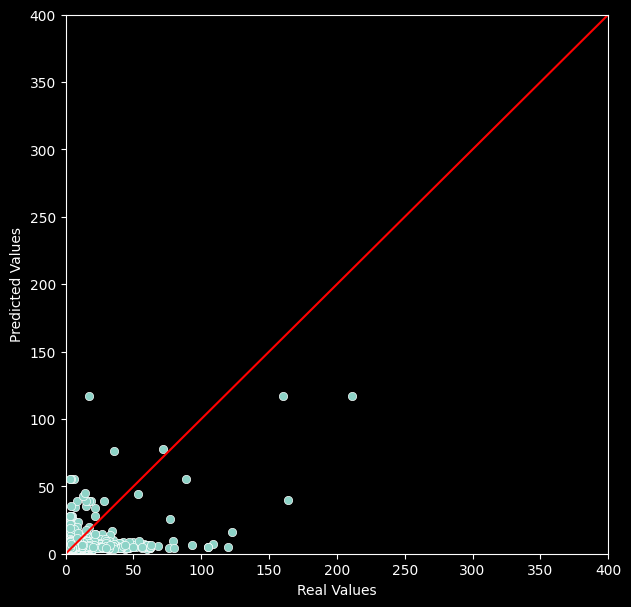

In [ ]:
# ▶ When the performance is not good?It is often much more beneficial to use average shipping in the area.
sns.scatterplot(x='Real Values', y='Predicted Values', data=result)
plt.xlim(0, 400)
plt.ylim(0, 400)

x = [0, 400]
y = [0, 400]
plt.plot(x, y, color='red')
plt.gcf().set_size_inches(7 ,7)

### · Identify important variables
---
* Finding important variables through feature IMP analysis


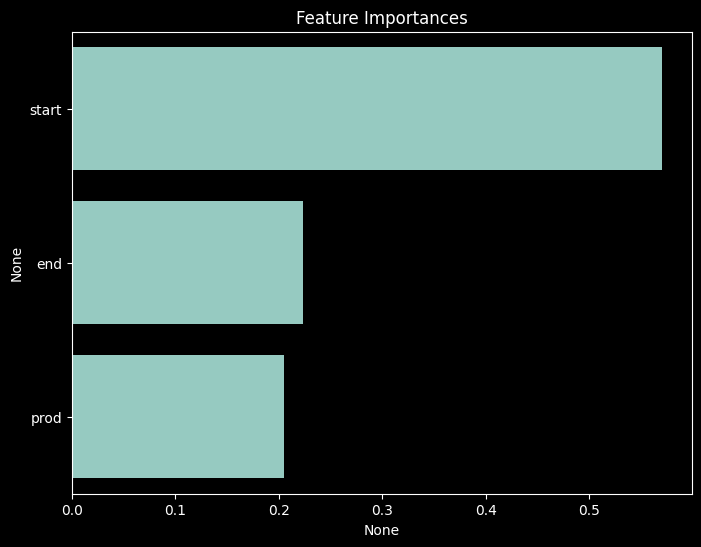

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumBarunGothic')
%matplotlib inline
plt.style.use(['dark_background'])

ftr_importances_values = rfr.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

### · Model Save and Read
---
* Save and load the final model


In [ ]:
import pickle
# Model storage
saved_model = pickle.dumps(rfr)

# Model READ
rfr_from_pickle = pickle.loads(saved_model)

In [ ]:
# ▶ Summary
# (1) Departure Destination: 4,229 places / destinations: 26,875 places
# (2) Total delivery amount (80%): Starting destination (top 500 places), destination (top 20,500 places)
# (3) Selection of representative goods
# -The best shipping goods
# -A area that delivers at least 50%of all goods shipping

# Final data for dispatching (feat. Handling item)
df_merge[df_merge['ratio'] > 0.50].loc[(0, 70, 96, 457, 1179, 1813, 1927),:]

,id,prod,cnt,total,ratio
0,5011000595017300,음반,1652,2357,0.70089
70,4148000690015300,문화컨텐츠,3064,5429,0.56438
96,1117000009037100,기타디지털/가전,837,1505,0.55615
457,5011000320025200,네일케어,35,69,0.50725
1179,3020000121041200,선글라스/안경테,14,27,0.51852
1813,4374500066090200,태블릿PC/노트북액세서리,25,40,0.62500
1927,4139000127044300,게임기/타이틀,60,87,0.68966
